In [1]:
import tensorflow_datasets as tfds

In [2]:
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete6E3S7H/imdb_reviews-train.tfrecord…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete6E3S7H/imdb_reviews-test.tfrecord*…

Generating unsupervised examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete6E3S7H/imdb_reviews-unsupervised.t…

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [3]:
info.features

FeaturesDict({
    'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
    'text': Text(shape=(None,), dtype=int64, encoder=<SubwordTextEncoder vocab_size=8185>),
})

In [4]:
info.features['text']

Text(shape=(None,), dtype=int64, encoder=<SubwordTextEncoder vocab_size=8185>)

In [5]:
tokenizer = info.features['text'].encoder

In [6]:
BUFFER_SIZE = 10000
BATCH_SIZE = 256

train_data, test_data = dataset['train'], dataset['test']

train_dataset = train_data.shuffle(BUFFER_SIZE)

train_dataset = train_dataset.padded_batch(BATCH_SIZE)
test_dataset = test_data.padded_batch(BATCH_SIZE)

In [7]:
import tensorflow as tf

embedding_dim = 64
lstm_dim = 64
dense_dim = 64

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, embedding_dim),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm_dim)),
    tf.keras.layers.Dense(dense_dim, activation = 'relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 64)          523840    
                                                                 
 bidirectional (Bidirectiona  (None, 128)              66048     
 l)                                                              
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 598,209
Trainable params: 598,209
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [10]:
NUM_EPOCHS = 10
history = model.fit(train_dataset, epochs = NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/10
98/98 [==============================] - 45s 348ms/step - loss: 0.6278 - accuracy: 0.6400 - val_loss: 0.5731 - val_accuracy: 0.7002
Epoch 2/10
98/98 [==============================] - 30s 304ms/step - loss: 0.3751 - accuracy: 0.8381 - val_loss: 0.3828 - val_accuracy: 0.8374
Epoch 3/10
98/98 [==============================] - 26s 266ms/step - loss: 0.2570 - accuracy: 0.9024 - val_loss: 0.3727 - val_accuracy: 0.8501
Epoch 4/10
98/98 [==============================] - 25s 252ms/step - loss: 0.1977 - accuracy: 0.9292 - val_loss: 0.4292 - val_accuracy: 0.8050
Epoch 5/10
98/98 [==============================] - 25s 251ms/step - loss: 0.2204 - accuracy: 0.9202 - val_loss: 0.4325 - val_accuracy: 0.8295
Epoch 6/10
98/98 [==============================] - 24s 239ms/step - loss: 0.1654 - accuracy: 0.9425 - val_loss: 0.5236 - val_accuracy: 0.8506
Epoch 7/10
98/98 [==============================] - 23s 229ms/step - loss: 0.2500 - accuracy: 0.8881 - val_loss: 0.6245 - val_accuracy: 0.6479

In [13]:
history.history

{'loss': [0.6277674436569214,
  0.37505465745925903,
  0.25701048970222473,
  0.19773349165916443,
  0.22039788961410522,
  0.16537576913833618,
  0.2499975711107254,
  0.39639395475387573,
  0.2160210907459259,
  0.1729213148355484],
 'accuracy': [0.639959990978241,
  0.8381199836730957,
  0.9023600220680237,
  0.9292399883270264,
  0.9202399849891663,
  0.942520022392273,
  0.8880800008773804,
  0.8216800093650818,
  0.9167199730873108,
  0.9357600212097168],
 'val_loss': [0.5731020569801331,
  0.3828207552433014,
  0.3726635277271271,
  0.4292234778404236,
  0.4325369596481323,
  0.5236139297485352,
  0.6245409250259399,
  0.4774056673049927,
  0.48712867498397827,
  0.5145405530929565],
 'val_accuracy': [0.7002000212669373,
  0.8374000191688538,
  0.8501200079917908,
  0.8050000071525574,
  0.8295199871063232,
  0.8506399989128113,
  0.6478800177574158,
  0.8000800013542175,
  0.821399986743927,
  0.8365600109100342]}

In [11]:
import matplotlib.pyplot as plt

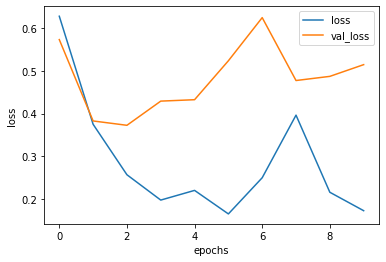

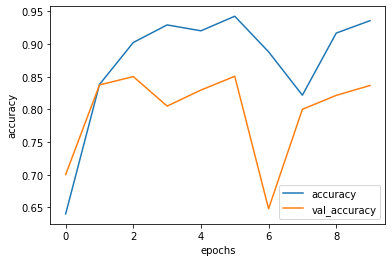

In [14]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history[f'val_{string}'])
  plt.xlabel('epochs')
  plt.ylabel(string)
  plt.legend([string, f'val_{string}'])
  plt.show()
plot_graphs(history, 'loss')
plot_graphs(history, 'accuracy')